In [1]:
# 3/3/24 Quantum Approximate Optimization Algorithm (QAOA) Vanilla  Proxy 14 qubits
# importing all required libraries
import supermarq
import qiskit
import qiskit_superstaq as qss
import os
import json
from qiskit.visualization import plot_histogram

In [3]:
# connecting api key from my account to simulate the circuits
api_key = "be695aae42b1ad94e1bfd8e698682a45d9b500a8d85a92309fe57187a5794380"
provider = qss.SuperstaqProvider(api_key)
# making sure to not run out of balance
print(provider.get_balance())

# setting circuit name to avoid having to change it everytime
name = "qaoa_v_proxy"

20.00 credits


In [4]:
# defining which circuit I want to use and how many qubits
qc = supermarq.qaoa_vanilla_proxy.QAOAVanillaProxy(num_qubits=14)
qc_circuit = qc.qiskit_circuit()

In [5]:
# setting the shot interval
x = 64

# setting up a simple while loop
while x<= 1024:   
    # setting the simulator that we will use to simulate our circuit (the default is ss_unconstrained_simulator)
    backend = provider.get_backend("ibmq_statevector_simulator")
    job_qss = backend.run(qc_circuit, shots=x, method="dry-run")

    # gettng the results of the simulation 
    job = job_qss.result()

    # getting the counts and printing them
    counts = job.get_counts()
    
    # getting accuracy to make sure this is accurate
    score = qc.score(counts)
    print(score)
    
    # creating a dictionary with outputs
    data = {
        'counts': counts,
        'accuracy': score
    }

    # logging results into a json file
    with open(name + '_counts_' + str(x) + '.json', 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)
        
    x += 64

0.6211223790036542
0.571794313361037
0.5706547210854649
0.5862020157021974
0.5939675230657382
0.5980049356991934
0.5665614916874919
0.5814401479792715
0.5828103720248998
0.6069588750072592
0.6023857060052884
0.5876672057707901
0.5814495402233009
0.5955164382811075
0.5750177315119405
0.5888881974946172


0.5888881974946172
{'00000000000000': 1, '10000010000000': 1, '10100010000000': 1, '00110010000000': 1, '00101010000000': 1, '10101010000000': 2, '00111010000000': 2, '01001110000000': 1, '10101110000000': 1, '11101110000000': 1, '10111110000000': 1, '01110101000000': 1, '00010011000000': 1, '10110011000000': 1, '00011011000000': 1, '00111111000000': 1, '10111111000000': 1, '00110010100000': 1, '01110010100000': 1, '00111010100000': 1, '01110110100000': 1, '00101110100000': 1, '01101110100000': 1, '10111110100000': 1, '00110001100000': 1, '01110001100000': 1, '01111001100000': 1, '01110101100000': 1, '01111101100000': 2, '00110011100000': 3, '01110011100000': 1, '01100111100000': 1, '01110111100000': 1, '10111110010000': 1, '00010011010000': 1, '11101111010000': 1, '10111111010000': 1, '10110100110000': 1, '01100010110000': 1, '01110010110000': 1, '00101010110000': 1, '01110110110000': 1, '01100001110000': 1, '01110011110000': 1, '01100111110000': 2, '01110111110000': 2, '1111011111000

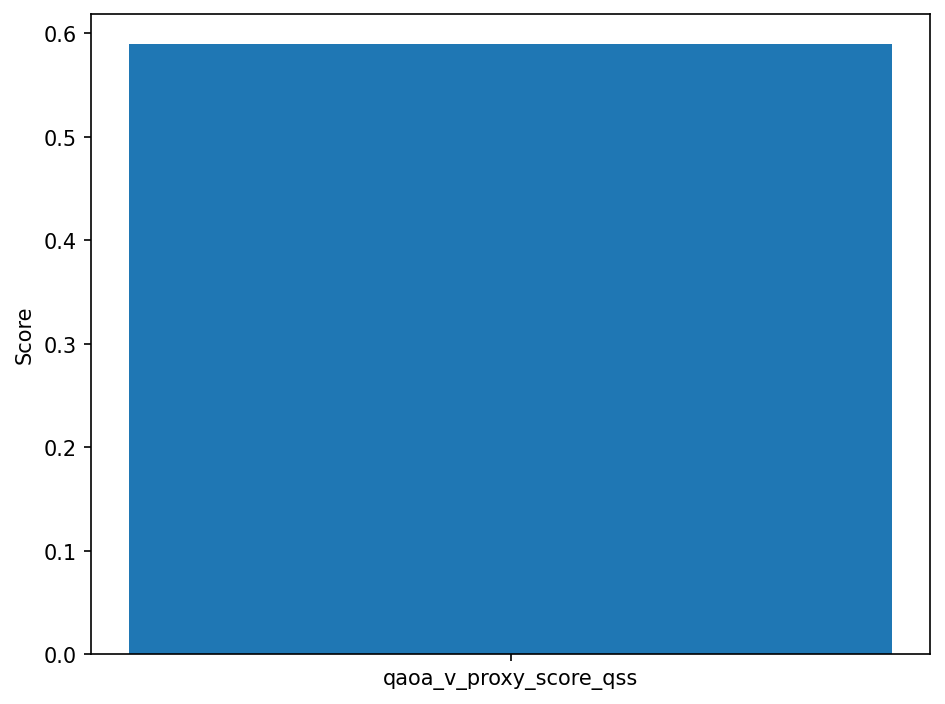

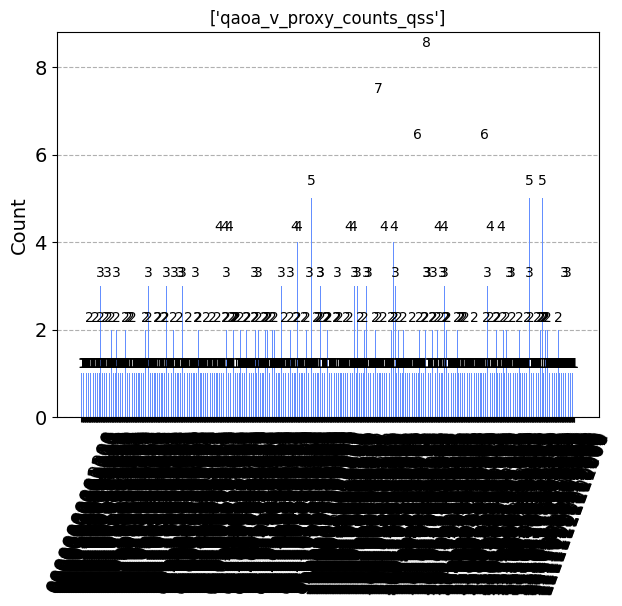

In [6]:
# measuring and getting fidelity of the result       
score = qc.score(counts)
print(score)
print(counts)

# plotting a bar chart of the benchmark results
supermarq.plotting.plot_results([score], [name + "_score_qss"])

# plotting a bar chart of the counts results
plot_histogram(counts, title=name + "_counts_qss")